# Redes neuronales recurrentes

## Fundamentos
Clase de red neuronal artificial usada para procesamiento de **datos secuenciales**

<center>
    <img src="figures/rnn-1.jpeg" width="700"/>
</center>

Trabaja con datos en diferentes pasos de tiempo, haciéndolas útiles para:
- Procesamiento de texto
- Procesamiento del habla
- Procesamiento de series de tiempo

Las conexiones entre unidades pueden crear **ciclos**, por lo que la salida de una neurona puede afectar a su propia entrada.

<center>
    <img src="figures/recurrent-1.png" width="500"/>
</center>

Son especialmente útiles para modelar comportamiento **temporales** o dinámicos.


## Unidad recurrente
Es la **pieza fundamental** de una RNN ya que mantiene un estado oculto que se actualiza a cada paso de tiempo dependiendo del input actual y del estado oculto anterior.

<center>
    <img src="figures/rnn-3.png" width="500"/>
</center>

Esto funciona como una especie de **memoria** del estado oculto en base a los datos temporales anteriores

<center>
    <img src="figures/rnn-5.png" width="400"/>
</center>

\begin{split}
    h_t = f( w_{xh} x_t + w_{hh} h_{t-1} )
\end{split}

\begin{split}
    y_t = f( w_{hy} h_{t} )
\end{split}



<center>
    <img src="figures/rnn-4.png" width="1400"/>
</center>

## Backpropagation through time  (BPTT)
Es una adaptación del algoritmo de backpropagation para optimizar los pesos en una RNN.

La función de costo total se expresa como la suma del costo en cada instante de tiempo:

\begin{split}
    S(w) = \sum_{t=1}^{T} S_t(w)
\end{split}

Del mismo modo su diferencial es:

\begin{split}
    \frac{\partial S(w)}{\partial w} = \sum_{t=1}^{T} \frac{\partial S_t(w)}{\partial w}
\end{split}

Usando regla de la cadena se puede expresar:

\begin{split}
    \frac{\partial S_t(w)}{\partial w} = \frac{\partial S_t(w)}{\partial \hat{y_t}} \cdot \frac{\partial \hat{y_t}}{\partial w} = \frac{\partial S_t(w)}{\partial \hat{y_t}} \cdot \frac{\partial \hat{y_t}}{\partial h_t} \cdot \frac{\partial h_t}{\partial w}
\end{split}

Los dos primeros factores se calculan de forma directa, pero en el tercero se debe poner atención a la **recurrencia**:
- $h_t$ depende de $h_{t-1}$ y de los pesos $w$
- A su vez, $h_{t-1}$ también depende de los pesos $w$

\begin{split}
    \frac{\partial h_t}{\partial w} = \frac{\partial h_t}{\partial w}^{*} + \frac{\partial h_t}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial w}
\end{split}

, donde * hace referencia a la derivada directa considerando otros valores constantes

# Ejemplo de Cálculo RNN

Supongamos una sucesión de datos: $x = \{1, 2\}$ y $y = \{3, 4\}$ para formar una RNN con los siguientes pesos iniciales:

<center>
    <img src="figures/ej-rnn-2.png" width="500"/>
</center>

Usaremos una función de costo de error cuadrático medio del tipo:

\begin{split}
    S(w) = \frac{1}{2} \sum_{i=1}^{m} (\hat{y} - y)^{2}
\end{split}




Para el instante de tiempo $t=2$ se tiene:


\begin{split}
    \frac{\partial S_2(w)}{\partial w} = \frac{\partial S_2(w)}{\partial \hat{y_2}} \cdot \frac{\partial \hat{y_2}}{\partial h_2} \cdot \left( \frac{\partial h_2}{\partial w}^{*} + \frac{\partial h_2}{\partial h_{1}} \frac{\partial h_{1}}{\partial w} \right) = (\hat{y_2} - y_2) \cdot w_y \cdot \left( \frac{\partial h_2}{\partial w}^{*} + \frac{\partial h_2}{\partial h_{1}} \frac{\partial h_{1}}{\partial w} \right)
\end{split}

Si queremos optimizar $w_x$, entonces:

\begin{split}
    \frac{\partial S_2(w)}{\partial w_x} = (\hat{y_2} - y_2) \cdot w_y \cdot \left( x_2 + w_h x_1 \right)
\end{split}



Para el instante de tiempo $t=1$ se tiene:


\begin{split}
    \frac{\partial S_1(w)}{\partial w} = \frac{\partial S_1(w)}{\partial \hat{y_1}} \cdot \frac{\partial \hat{y_1}}{\partial h_1} \cdot \frac{\partial h_1}{\partial w}  = (\hat{y_1} - y_1) \cdot w_y \cdot \frac{\partial h_1}{\partial w} 
\end{split}

Si queremos optimizar $w_x$, entonces:

\begin{split}
    \frac{\partial S_1(w)}{\partial w_x} = (\hat{y_1} - y_1) \cdot w_y \cdot x_1 
\end{split}

Finalmente se tiene que:

\begin{split}
    \frac{\partial S(w)}{\partial w_x} = \sum_{t=1}^{2} \frac{\partial S_t(w)}{\partial w_x} = (\hat{y_1} - y_1) \cdot w_y \cdot \left( x_1  +  x_2 + w_h x_1 \right)
\end{split}

Utilizamos el grandiente descendente para actualizar el valor de $w_x$:

\begin{split}
    w_x := w_x - L \cdot \frac{\partial S(w)}{\partial w_x}
\end{split}

\begin{split}
    w_x := w_x - L \cdot (\hat{y_1} - y_1) \cdot w_y \cdot \left( x_1  +  x_2 + w_h x_1 \right)
\end{split}

Para la RNN del ejemplo se tiene que:

\begin{split}
    h_1 = 0.2;\quad \hat{y_1} = 0.02;\quad h_2 = 0.46;\quad \hat{y_2} = 0.046
\end{split}

Actualizamos el coeficiente $w_x$ asumiendo $L=0.1$:
\begin{split}
    w_x := 0.2 - 0.1 \cdot (0.02 - 3) \cdot 0.1 \cdot \left( 1  +  2 + 0.3 \cdot 1 \right) = 0.298
\end{split}

Para el coeficiente $w_y$ resulta:
\begin{split}
    w_y := w_y - L \cdot \left( (\hat{y_1} - y_1) h_1 + (\hat{y_2} - y_2) h_2 \right)
\end{split}

\begin{split}
    w_y := 0.1 - 0.1 \cdot \left( (0.02 - 3) 0.2 + (0.046 - 4) 0.46 \right) = 0.341
\end{split}

Para el coeficiente $w_h$ resulta:
\begin{split}
    w_h := w_h - L \cdot  (\hat{y_2} - y_2) w_y \cdot h_1 
\end{split}

\begin{split}
    w_h := 0.3 - 0.1 \cdot  (0.046 - 4) 0.1 \cdot 0.2  = 0.308
\end{split}

Con los ajustes las nuevas predicciones son:

\begin{split}
    h_1 = 0.298;\quad \hat{y_1} = 0.102;\quad h_2 = 0.688;\quad \hat{y_2} = 0.235
\end{split}

# Predicción de series temporales con MLP y RNN

## Importa módulos

In [1]:
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.random import set_seed
import matplotlib.pyplot as plt
import random

np.random.seed(42)
set_seed(42)
random.seed(42)

## Crea serie temporal simple

In [2]:
sequence = np.array([i for i in range(50)])

seq_length = 5
data_train = timeseries_dataset_from_array(data=sequence[:-5], targets=sequence[5:], sequence_length=seq_length, batch_size=1)
print(len(data_train))

count = 0
for batch in data_train:
    if count % 10 == 0:
        print(batch)
    count +=1

41
(<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[0, 1, 2, 3, 4]])>, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([5])>)
(<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[10, 11, 12, 13, 14]])>, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([15])>)
(<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[20, 21, 22, 23, 24]])>, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([25])>)
(<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[30, 31, 32, 33, 34]])>, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([35])>)
(<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[40, 41, 42, 43, 44]])>, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([45])>)


## Define modelo MLP y entrena

In [3]:
model = Sequential([
    Input(shape=(seq_length,)),
    Dense(5, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
print(model.summary())
model.fit(data_train, epochs=100, verbose=2, shuffle=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
41/41 - 1s - 27ms/step - loss: 300.2270
Epoch 2/100
41/41 - 0s - 2ms/step - loss: 119.3679
Epoch 3/100
41/41 - 0s - 2ms/step - loss: 33.1175
Epoch 4/100
41/41 - 0s - 2ms/step - loss: 6.2658
Epoch 5/100
41/41 - 0s - 2ms/step - loss: 2.3370
Epoch 6/100
41/41 - 0s - 2ms/step - loss: 1.9482
Epoch 7/100
41/41 - 0s - 2ms/step - loss: 1.8576
Epoch 8/100
41/41 - 0s - 2ms/step - loss: 1.7334
Epoch 9/100
41/41 - 0s - 2ms/step - loss: 0.7940
Epoch 10/100
41/41 - 0s - 2ms/step - loss: 1.1402
Epoch 11/100
41/41 - 0s - 2ms/step - loss: 1.0851
Epoch 12/100
41/41 - 0s - 2ms/step - loss: 0.9515
Epoch 13/100
41/41 - 0s - 2ms/step - loss: 0.8376
Epoch 14/100
41/41 - 0s - 2ms/step - loss: 0.7435
Epoch 15/100
41/41 - 0s - 2ms/step - loss: 0.6629
Epoch 16/100
41/41 - 0s - 2ms/step - loss: 0.5898
Epoch 17/100
41/41 - 0s - 2ms/step - loss: 0.5216
Epoch 18/100
41/41 - 0s - 2ms/step - loss: 0.4571
Epoch 19/100
41/41 - 0s - 2ms/step - loss: 0.4121
Epoch 20/100
41/41 - 0s - 2ms/step - loss: 0.362

## Realiza algunas predicciones

In [4]:
test_input = np.array([[45, 46, 47, 48, 49]])
test_input = np.array([[65, 66, 67, 68, 69]])

#test_input = np.array([[45, 46, 47, 48, 49], [95, 96, 97, 98, 99]])
print(test_input.shape)

predicted_number = model.predict(test_input, verbose=0)
print("Predicted next number in sequence:", predicted_number)
print(predicted_number.shape)

(1, 5)
Predicted next number in sequence: [[71.5792]]
(1, 1)


## Crea serie temporal más compleja

801


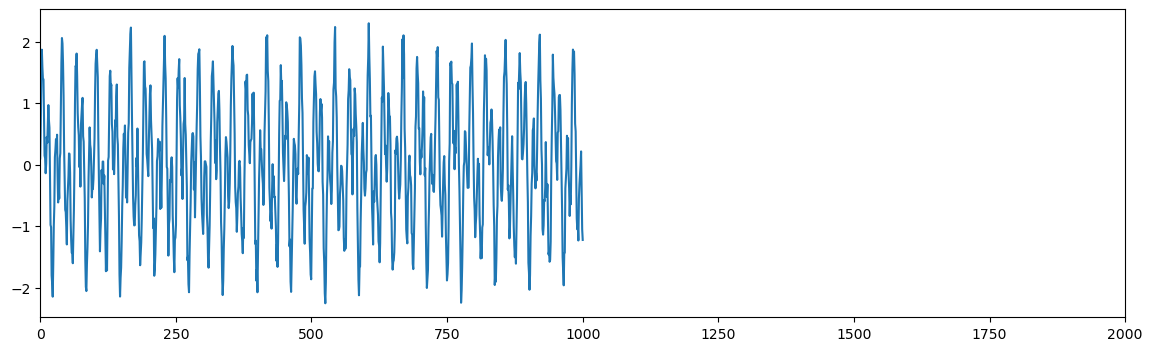

In [5]:
n_points = 1000
time_steps = np.linspace(0, 1000, n_points) 
high_freq_sine_wave = np.sin(0.5*time_steps)
low_freq_sine_wave = 2*np.sin(time_steps / 5)
sequence = high_freq_sine_wave + 0.5 * low_freq_sine_wave + 0.2 * np.random.normal(size=n_points)

seq_length = 100
data_train = timeseries_dataset_from_array(data=sequence[:-seq_length], targets=sequence[seq_length:], sequence_length=seq_length, batch_size=1)
print(len(data_train))

plt.figure(figsize=(14,4))
plt.xlim(0, 2000)
plt.plot(time_steps, sequence)
plt.show()

## Crea modelo MLP y lo entrena

In [18]:
model_mlp = Sequential([
    Input(shape=(seq_length,)),
    Dense(5, activation='relu'),
    Dense(1)
])

model_mlp.compile(optimizer='adam', loss='mse')
print(model_mlp.summary())
model_mlp.fit(data_train, epochs=10, verbose=2, shuffle=True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 5)                   │             505 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
801/801 - 1s - 1ms/step - loss: 0.3199
Epoch 2/10
801/801 - 1s - 764us/step - loss: 0.1279
Epoch 3/10
801/801 - 1s - 852us/step - loss: 0.0903
Epoch 4/10
801/801 - 1s - 830us/step - loss: 0.0753
Epoch 5/10
801/801 - 1s - 952us/step - loss: 0.0664
Epoch 6/10
801/801 - 1s - 985us/step - loss: 0.0632
Epoch 7/10
801/801 - 1s - 977us/step - loss: 0.0580
Epoch 8/10
801/801 - 1s - 949us/step - loss: 0.0562
Epoch 9/10
801/801 - 1s - 837us/step - loss: 0.0515
Epoch 10/10
801/801 - 1s - 872us/step - loss: 0.0506


## Continúa el entrenamiento

In [19]:
model_mlp.fit(data_train, epochs=100, verbose=2, shuffle=True, initial_epoch=10)

Epoch 11/100
801/801 - 1s - 982us/step - loss: 0.0485
Epoch 12/100
801/801 - 1s - 847us/step - loss: 0.0474
Epoch 13/100
801/801 - 1s - 917us/step - loss: 0.0467
Epoch 14/100
801/801 - 1s - 858us/step - loss: 0.0461
Epoch 15/100
801/801 - 1s - 873us/step - loss: 0.0449
Epoch 16/100
801/801 - 1s - 888us/step - loss: 0.0446
Epoch 17/100
801/801 - 1s - 870us/step - loss: 0.0440
Epoch 18/100
801/801 - 1s - 836us/step - loss: 0.0434
Epoch 19/100
801/801 - 1s - 744us/step - loss: 0.0434
Epoch 20/100
801/801 - 1s - 708us/step - loss: 0.0427
Epoch 21/100
801/801 - 1s - 759us/step - loss: 0.0423
Epoch 22/100
801/801 - 1s - 741us/step - loss: 0.0420
Epoch 23/100
801/801 - 1s - 874us/step - loss: 0.0417
Epoch 24/100
801/801 - 1s - 879us/step - loss: 0.0416
Epoch 25/100
801/801 - 1s - 715us/step - loss: 0.0412
Epoch 26/100
801/801 - 1s - 730us/step - loss: 0.0410
Epoch 27/100
801/801 - 1s - 695us/step - loss: 0.0407
Epoch 28/100
801/801 - 1s - 808us/step - loss: 0.0407
Epoch 29/100
801/801 - 1s - 

## Realiza predicciones hacia adelante con MLP

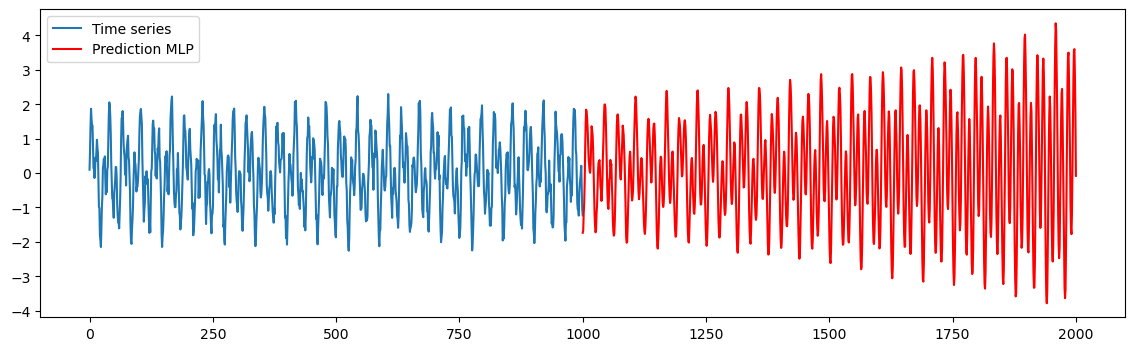

In [20]:
further_points = 1000
further_time_steps = np.linspace(1000, 2000, further_points) 

predictions = []
input_seq = sequence[-seq_length:] #secuencia inicial (últimos puntos anteriores)

for _ in range(further_points): #predice siguientes puntos
    input_seq_expand = np.expand_dims(input_seq, axis=0)
    predicted_point = model_mlp.predict(input_seq_expand, verbose=0)
    predictions.append(predicted_point[0][0])
    input_seq = np.append(input_seq[1:], predicted_point)  #corre la ventana

plt.figure(figsize=(14, 4))
plt.plot(time_steps, sequence, label='Time series')
plt.plot(further_time_steps, predictions, label='Prediction MLP', color='red')
plt.legend()
plt.show()

## Crea modelo RNN y lo entrena

In [15]:
model_rnn = Sequential([
    Input(shape=(seq_length, 1)),
    SimpleRNN(5, activation='tanh'),
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')
print(model_rnn.summary())
model_rnn.fit(data_train, epochs=10, verbose=2, shuffle=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
801/801 - 6s - 7ms/step - loss: 0.4122
Epoch 2/10
801/801 - 5s - 6ms/step - loss: 0.1547
Epoch 3/10
801/801 - 5s - 6ms/step - loss: 0.1099
Epoch 4/10
801/801 - 5s - 6ms/step - loss: 0.0930
Epoch 5/10
801/801 - 5s - 6ms/step - loss: 0.0868
Epoch 6/10
801/801 - 5s - 6ms/step - loss: 0.0834
Epoch 7/10
801/801 - 5s - 7ms/step - loss: 0.0809
Epoch 8/10
801/801 - 6s - 7ms/step - loss: 0.0785
Epoch 9/10
801/801 - 5s - 6ms/step - loss: 0.0761
Epoch 10/10
801/801 - 5s - 6ms/step - loss: 0.0736


## Continúa entrenamiento

In [16]:
model_rnn.fit(data_train, epochs=100, verbose=2, shuffle=True, initial_epoch=10)

Epoch 11/100
801/801 - 5s - 7ms/step - loss: 0.0710
Epoch 12/100
801/801 - 5s - 6ms/step - loss: 0.0690
Epoch 13/100
801/801 - 5s - 6ms/step - loss: 0.0676
Epoch 14/100
801/801 - 5s - 6ms/step - loss: 0.0665
Epoch 15/100
801/801 - 5s - 6ms/step - loss: 0.0658
Epoch 16/100
801/801 - 5s - 6ms/step - loss: 0.0651
Epoch 17/100
801/801 - 5s - 6ms/step - loss: 0.0646
Epoch 18/100
801/801 - 5s - 6ms/step - loss: 0.0641
Epoch 19/100
801/801 - 5s - 6ms/step - loss: 0.0637
Epoch 20/100
801/801 - 5s - 6ms/step - loss: 0.0633
Epoch 21/100
801/801 - 5s - 6ms/step - loss: 0.0630
Epoch 22/100
801/801 - 5s - 6ms/step - loss: 0.0627
Epoch 23/100
801/801 - 5s - 6ms/step - loss: 0.0625
Epoch 24/100
801/801 - 5s - 6ms/step - loss: 0.0622
Epoch 25/100
801/801 - 5s - 6ms/step - loss: 0.0620
Epoch 26/100
801/801 - 5s - 6ms/step - loss: 0.0617
Epoch 27/100
801/801 - 5s - 6ms/step - loss: 0.0615
Epoch 28/100
801/801 - 6s - 7ms/step - loss: 0.0613
Epoch 29/100
801/801 - 5s - 6ms/step - loss: 0.0611
Epoch 30/100

## Realiza predicciones hacia adelante con RNN

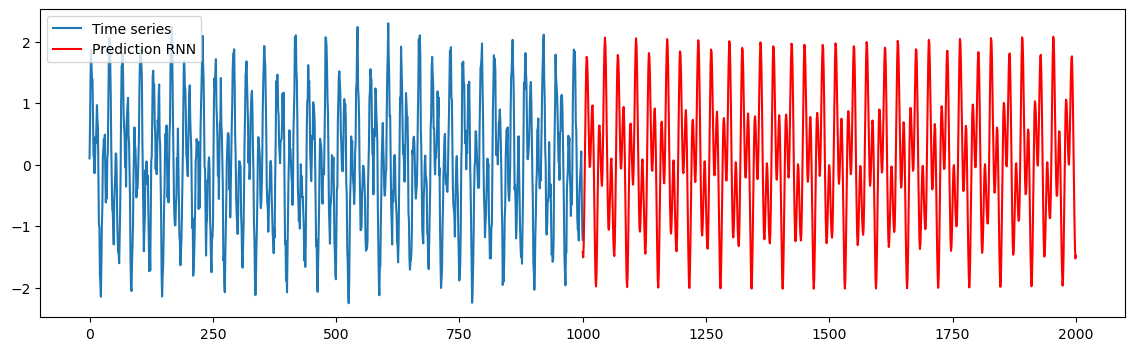

In [17]:
further_points = 1000
further_time_steps = np.linspace(1000, 2000, further_points) 

predictions = []
input_seq = sequence[-seq_length:] #secuencia inicial (últimos puntos anteriores)

for _ in range(further_points): #predice siguientes puntos
    input_seq_expand = np.expand_dims(input_seq, axis=0)
    predicted_point = model_rnn.predict(input_seq_expand, verbose=0)
    predictions.append(predicted_point[0][0])
    input_seq = np.append(input_seq[1:], predicted_point)  #corre la ventana

plt.figure(figsize=(14, 4))
plt.plot(time_steps, sequence, label='Time series')
plt.plot(further_time_steps, predictions, label='Prediction RNN', color='red')
plt.legend()
plt.show()

# Red recurrente LSTM

La arquitectura original de una RNN sufre del problema de **desvanecimiento del gradiente** para dependencias temporales de largo alcance.

<center>
    <img src="figures/vanishing-gradient.png" width="500"/>
</center>
Esto significa que los gradientes se vuelven muy cercanos a cero, haciendo imposible la correcta actualización de coeficientes

La red LSTM (long-short) resuelve este problema implementando una estructura que permite "recordar" u "olvidar" datos  dentro de la secuencia

<center>
    <img src="figures/rnn-vs-lstm.png" width="500"/>
</center>


## Crea y entrena LSTM para serie de tiempo

In [12]:
model_lstm = Sequential([
    Input(shape=(seq_length, 1)),
    LSTM(5, activation='tanh'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
print(model_lstm.summary())
model_lstm.fit(data_train, epochs=10, verbose=2, shuffle=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5)                   │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
801/801 - 9s - 12ms/step - loss: 0.7089
Epoch 2/10
801/801 - 8s - 10ms/step - loss: 0.4740
Epoch 3/10
801/801 - 8s - 10ms/step - loss: 0.4254
Epoch 4/10
801/801 - 8s - 10ms/step - loss: 0.3533
Epoch 5/10
801/801 - 9s - 11ms/step - loss: 0.2737
Epoch 6/10
801/801 - 8s - 10ms/step - loss: 0.2114
Epoch 7/10
801/801 - 8s - 10ms/step - loss: 0.1655
Epoch 8/10
801/801 - 8s - 10ms/step - loss: 0.1327
Epoch 9/10
801/801 - 8s - 10ms/step - loss: 0.1112
Epoch 10/10
801/801 - 8s - 10ms/step - loss: 0.0996


## Continúa el entrenamiento

In [13]:
model_lstm.fit(data_train, epochs=100, verbose=2, shuffle=True, initial_epoch=10)

Epoch 11/100
801/801 - 8s - 10ms/step - loss: 0.0935
Epoch 12/100
801/801 - 8s - 10ms/step - loss: 0.0895
Epoch 13/100
801/801 - 8s - 10ms/step - loss: 0.0864
Epoch 14/100
801/801 - 8s - 10ms/step - loss: 0.0839
Epoch 15/100
801/801 - 8s - 10ms/step - loss: 0.0818
Epoch 16/100
801/801 - 8s - 10ms/step - loss: 0.0801
Epoch 17/100
801/801 - 8s - 10ms/step - loss: 0.0785
Epoch 18/100
801/801 - 10s - 13ms/step - loss: 0.0771
Epoch 19/100
801/801 - 8s - 10ms/step - loss: 0.0758
Epoch 20/100
801/801 - 8s - 10ms/step - loss: 0.0746
Epoch 21/100
801/801 - 8s - 10ms/step - loss: 0.0735
Epoch 22/100
801/801 - 8s - 10ms/step - loss: 0.0725
Epoch 23/100
801/801 - 8s - 10ms/step - loss: 0.0715
Epoch 24/100
801/801 - 8s - 10ms/step - loss: 0.0707
Epoch 25/100
801/801 - 8s - 10ms/step - loss: 0.0699
Epoch 26/100
801/801 - 8s - 10ms/step - loss: 0.0691
Epoch 27/100
801/801 - 11s - 13ms/step - loss: 0.0684
Epoch 28/100
801/801 - 8s - 10ms/step - loss: 0.0678
Epoch 29/100
801/801 - 8s - 10ms/step - loss

## Realiza predicciones hacia adelante con LSTM

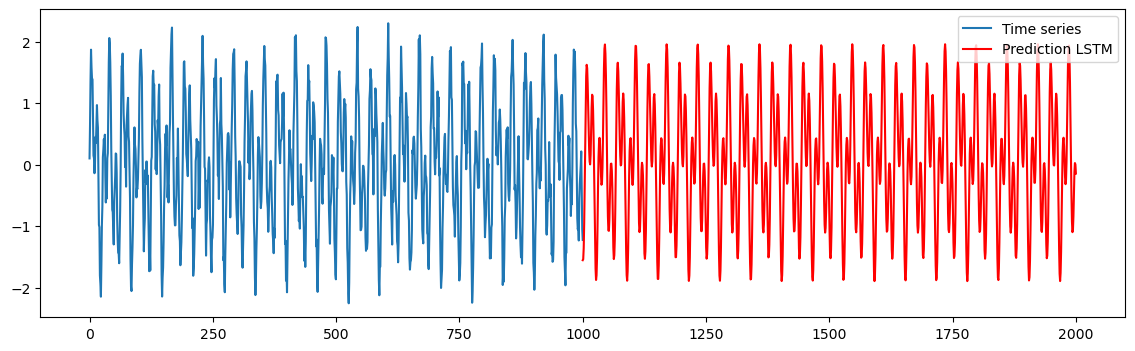

In [14]:
further_points = 1000
further_time_steps = np.linspace(1000, 2000, further_points) 

predictions = []
input_seq = sequence[-seq_length:] #secuencia inicial (últimos puntos anteriores)

for _ in range(further_points): #predice siguientes puntos
    input_seq_expand = np.expand_dims(input_seq, axis=0)
    predicted_point = model_lstm.predict(input_seq_expand, verbose=0)
    predictions.append(predicted_point[0][0])
    input_seq = np.append(input_seq[1:], predicted_point)  #corre la ventana

plt.figure(figsize=(14, 4))
plt.plot(time_steps, sequence, label='Time series')
plt.plot(further_time_steps, predictions, label='Prediction LSTM', color='red')
plt.legend()
plt.show()